# ABCD - It is a technique used for detecting the probability of a lesion being a melanoma.

### A - Asymmetry / Asimetría
The asymmetry of the lesion. The more asymmetrical the more probable it is of being melanoma. The developed code for detecting symmetry is a product of this project. We have not tested how accurate it is nor do we recommend it's use, until it has been more properly tested. It is experimental, howerver given the constraints of this project it is considered to be functional. A simple explanation will be offered:

El código de asimetría es producto de esta investgación. No se ha probado, por lo cual no se recomienda el uso de este hasta que se haya probado de una manera más completa.

It is assumed that a nevi(e.g. mole) should be as round as possible. Ideally it is a circle. Therefore we idealize this, and compare the picture given to a circle. For this we give a score, if this score is too high we rate the object as not symmetric. For that we must first apply a threshold, do that we only have two values, 0 for healthy skin and 255 for non-healthy skin. Which corresponds to black and white respectively. 

Se asume que un nevo(lunar) debe ser lo más circular posible. Idealmente un circulo. Por lo cual idealizamos este concepto y comparamos la image con un circulo. Esto lo hacemos por medio de un puntaje. Si este puntaje es muy alto se dice que el objeto no es simétrico.Para lograr esto primeramente se le debe aplicar un umbral a la imagen de forma que la piel sana tenga un valor de 0 y la piel no sana tenga un valor de 255. Lo cual corresponde a negro y blanco respectivamente.


Examples, Ejemplos:
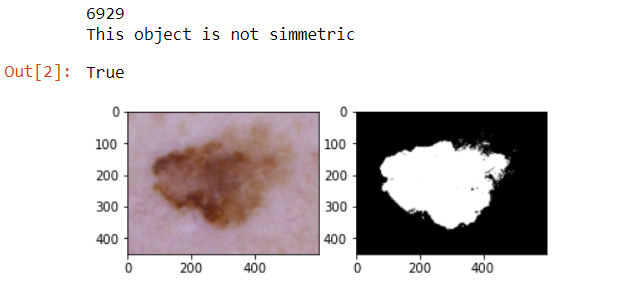

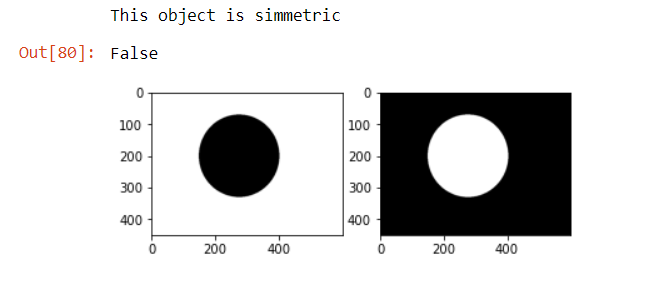

We used Otsu's threshold, for it is independant of the skin tone and adapts itself. This is done in the effor to maintain the code relevant and keep maintainance low.

Se utilizo el umbral de Otsu, ya que este es independiente del tono de piel y es capaz de adaptarse. Esto para mantener el código relevante y que necesite poco mantenimiento.

Once we have the binary image, we must centre the x axis on the middle of the object. This is done because later on we are going to compare how far each side reaches. The longer one side is compared to the other the more score will be assigned to the image. This is why we need the centre on the x axis, because this is the middle point that divides the image. Once calculated we give compare the score if it is above the designated mark(e.g. 1000 in this code) the object is considered assimetric.

Una vez que se tiene la imagen binaria, se debe centrar el eje x en el centro del objeto. Esto ya que se va a comparar cuan largo es cada mitad del objeto. Cuanto mas largo sea un lado comparado al otro va a tener un puntaje más alto. Entre más alto el puntaje se considera más asimétrico. Se designa un puntaje máximo, el cual una vez que se sobre pasa el objeto se considera asimétrico.


Improvements: The code heavily relies on the positioning of the object relative to the centre of the image. The more centered it is, the more accurate the result. It could be done not to depend on this, but currently it is not felt that it is a necessity. To do this you would need to find the centre of the object, after the threshold has been applied. Another part that could be improved is that this code only tests the x axis, it could easily be adapted to test both sides and increase the mark. We belive this could give a far more deeper study of the object.

[10362, 6933]
[14253, 12240]
[18755, 18551]
[17142, 19436]
[14519, 15389]
[13920, 10121]
[6933, 10088]
[12239, 14107]
[18551, 18535]
[19437, 17046]
[15389, 14723]
[10122, 14100]
[10088, 7059]
[14107, 12022]
[18535, 18460]
[17046, 19315]
[14723, 15355]
[14099, 10453]
[7059, 10362]
[12022, 14253]
[18461, 18755]
[19314, 17142]
[15355, 14519]
[10452, 13919]


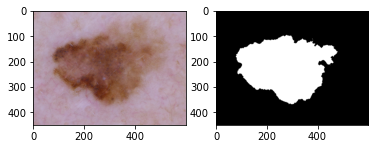

In [13]:
import cv2 #Image Library
import numpy as np #Numpy library
import matplotlib.pyplot as plt #matplotlib to show images
import statistics
import imutils
from statistics import mean

#https://stackoverflow.com/questions/19222343/filling-contours-with-opencv-python/35670916
#https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/
#https://www.sciencedirect.com/science/article/abs/pii/S0895611116300398

def assymetry(imageName):
    image = cv2.imread(imageName) #read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Same image but in grayscale, this is done for calculating the threshold
    ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #get contours
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #fill in the contour
    cv2.drawContours(thresh, contours, -1, (255,255,255), thickness=cv2.FILLED)
    #find largest area contour and remove the smaller ones
    max_area = -1
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if area>max_area:
            max_cont = contours[i]
            max_area = area
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if (area < max_area):
            cv2.drawContours(thresh, contours, -1, (0,0,0), 3)
    for angle in np.arange(0, 360, 15):
        rotated = imutils.rotate_bound(thresh, angle)
        print(findsymmetry(rotated))
    
#     image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
    #Get the threshold, separate the melanoma from healthy skin
    #It is done to binary, so all values are sent to either extreme, 0 or 1
#     x_first= 0 #get first white 
#     x_last = w-1
#     y_mid = int(np.ceil(h/2)) #assumption that image is well centred at y axis
    
    
#     #find the borders of the melanoma
#     while(thresh[y_mid][x_first] != 255):
#         x_first += 1
#     while(thresh[y_mid][x_last] != 255):
#         x_last -= 1
#     x_mid = int(np.ceil((x_last-x_first)/2 + x_first)) #the middle of the melanoma
#     #might have to redo this if I wish to truly get the middle of the object
    
#     #calculate how symmetric the object is:
#     tot_score = 0 #the lower the more symmetric it is
#     for i in range(0,h):
#         score_o = 0
#         for j in range(0,x_mid):
#             if( thresh[i][j] == 255):
#                 score_o += 1 
#         for j in range(x_mid,w):
#             if( thresh[i][j] == 255):
#                 score_o -= 1
#         tot_score += abs(score_o) #update the score
#     print(tot_score)
    
    
    thresh = thresh.clip(0, 255).astype('uint8') #Convert the threshold to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    f, axarr = plt.subplots(1,2) #row,column
    axarr[0].imshow(image,cmap='hsv', vmin=0, vmax=255)
    axarr[1].imshow(thresh,cmap='gray', vmin=0, vmax=255) #show threshold
    
    
#     if(tot_score >= 1000):
#         print("This object is not simmetric")
#         return True #it is asymmetric
#     print("This object is simmetric")
#     return False #it is symmetric

def findsymmetry(im):
    #find the simetry lines along the x and y axis for the im image
    [y_max,x_max] = im.shape #get width and length of the image
    x = []
    xmina=[]
    xmaxa=[]
    y_max-=1
    x_max-=1
    for y in range(y_max):
        [x_next,xmin,xmax] = findmiddle(im[y,:],x_max)
        if(x_next != 0):
            x.append(x_next)
            xmina.append(xmin)
            xmaxa.append(xmax)
    x_line = int(mean(x))
    xassymetry = 0
    for i in range(len(xmina)):
        xassymetry += abs(abs(xmaxa[i]-x_line)-abs(xmina[i]-x_line))
    #centre line for y
    y = []
    ymina=[]
    ymaxa=[]
    for x in range(x_max):
        [y_next,ymin,ymax] = findmiddle(im[:,x],y_max)
        if(y_next != 0):
            y.append(y_next)
            ymina.append(ymin)
            ymaxa.append(ymax)
    y_line = int(mean(y))
    yassymetry = 0
    for i in range(len(ymina)):
        yassymetry += abs(abs(ymaxa[i]-y_line)-abs(ymina[i]-y_line))
    return [yassymetry,xassymetry]
def findmiddle(line,max_):
    #return the halfway point between the first and last white pixel in a line, if there's no
    #white pixel it returns 0
    #line is the current line, can be row or column
    #max is the len of said line
    #min_ and max_ is the first and last white pixel
    min_=0
    while(line[min_] != 255):
        min_+=1
        if min_>=max_:#has no white pixels
            return [0,0,0]
    while(line[max_-1] != 255):
        max_-=1
    return [((max_-min_)/2)+min_,min_,max_]
imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
assymetry(imname)

[267, 275]
[413, 462]
[707, 732]
[845, 822]
[760, 676]
[390, 474]
[275, 239]
[462, 433]
[732, 659]
[822, 769]
[675, 675]
[474, 530]
[239, 243]
[433, 428]
[659, 648]
[766, 765]
[676, 718]
[530, 414]
[243, 267]
[428, 413]
[648, 707]
[765, 842]
[718, 760]
[414, 390]
None


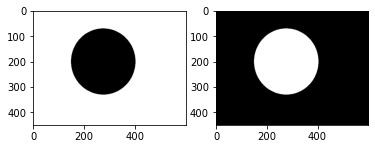

In [14]:
# imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
imname = "Images/FirstImages/assymetrytest.png"
print(assymetry(imname))

# imname = "Images/FirstImages/HealthyMole.jpg"
# print(assymetry(imname))

# imname = "Images/FirstImages/ISIC_0024940.png"
# print(assymetry(imname))


### B - Border / Bordes
The border of the lesion. Melanomas may have borders that are vaguely defined. 

### C - Colour / Color
Multiple colours are a warning sign. It is considered one of the early warning signs. While benign moles are usually a single shade of brown, a melanoma may have different shades of colour this is called variegation. This is the key to finding determining the C factor in ABCD.

El código de color es producto de esta investgación. No se ha probado, por lo cual no se recomienda el uso de este hasta que se haya probado de una manera más completa. Sin embargo, ha funcionado para esta investgación y se continuará utilizando.

The process of images under this category consists of 3 main parts. First we apply a threshold to the images as to get a binary mask(representation) of the lesion. To this mask we must reapply the original image, this is the second part. The last step is to use a histogram of the H (as in HSV) value which represents the variation of the image. It doesn´t matter the value individually of each H value but the range of it, so we sum up if the current H value is greater than 0.

El proceso de colores consiste en 3 grandes partes. Primeramente se le debe aplicar una máscara binaria a la imagen, para que se separe la lesión de la piel sana. Una vez que se tiene la máscara se le devuelve el color a la lesión. El último paso es hacer un histograma de la nueva imagen. Para este se toma solo el valor H de SV en cuenta. No importa el tanto hay de un valor H individualmente, sino cuantos valores H hay. Se hace una sumatoria de todos los valores mayores a 0.

Examples, Ejemplos:
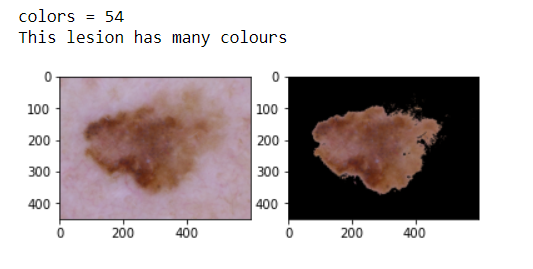
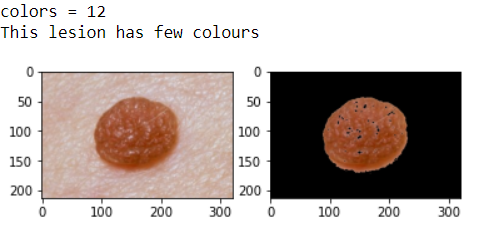

The use of HSV is deliberate. According to some research that was carried out, it represents more closely how humans see. On top of that, it was determined the H value is what represents a color rather than its shades.

La selección de la representación HSV no se tomo de forma ligera. Este, según la investigación realizada, representa más cercanamente como es que los humanos ven. Además, de esto se determinó que el valor H es el valor que representa la varianza de colores en vez de diferentes tonos del mismo.

Improvements: More reasearch could be carried out to determine that H is truly the best metric to compare images and their colours.

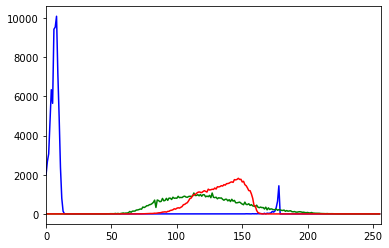

colors = 54
This lesion has many colours


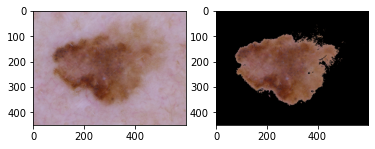

In [5]:
import cv2 #Image Library
import numpy as np #Numpy library
import matplotlib.pyplot as plt #matplotlib to show images

def colour(imageName):
    image = cv2.imread(imageName) #read the image
    [h,w,_] = image.shape #get width and length of the image
    
    roi = image[0:h, 0:w]

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Same image but in grayscale, this is done for calculating the threshold
    _,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    mask_inv = cv2.bitwise_not(thresh) #invert it and transform it to a bitwise image, so it's easier to use
    masked = cv2.bitwise_and(roi,roi,mask = mask_inv) #do and between the two
    masked = cv2.cvtColor(masked, cv2.COLOR_BGR2HSV)
    
    #get the size of the mask
    size = 0
    for x in range(h):
        for y in range(w):
            if(mask_inv[x][y] > 0):
                size +=1
    
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([masked],[i],None,[256],[1,256])
        plt.plot(histr,col)
        plt.xlim([0,256])
    plt.show()
    
    histr = cv2.calcHist([masked],[0],None,[256],[1,256])
    colors = 0
    for i in histr:
        if(i > 0):
            colors += 1
    print("colors = "+str(colors))    
    if (colors > 20):
        print("This lesion has many colours")
    else:
        print("This lesion has few colours")
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masked = cv2.cvtColor(masked, cv2.COLOR_HSV2RGB)
    
    f, axarr = plt.subplots(1,2) #row,column
    axarr[0].imshow(image,cmap='hsv', vmin=0, vmax=255)
    axarr[1].imshow(masked,cmap='hsv', vmin=0, vmax=255) #mask
    
    
imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
colour(imname)

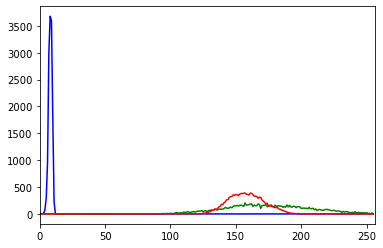

colors = 12
This lesion has few colours


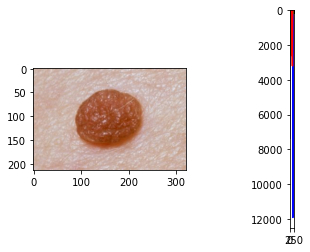

colors = 87
This lesion has many colours


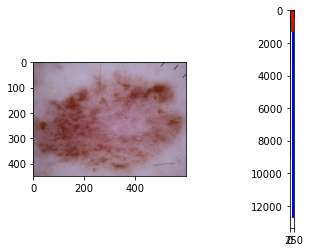

colors = 32
This lesion has many colours


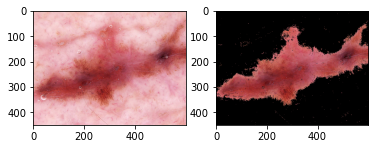

In [6]:
imname = "Images/FirstImages/HealthyMole.jpg"
colour(imname)

imname = "Images/FirstImages/ISIC_0024961.png"
colour(imname)

imname = "Images/FirstImages/ISIC_0024940.png"
colour(imname)

### D - Dimension / Dimensión

Melanoma growths are normally larger than 6mm in diameter, which is about the diameter of a standard pencil.
While it’s ideal to detect a melanoma when it is small, it’s a warning sign if a lesion is the size of a pencil eraser (about 6 mm, or ¼ inch in diameter) or larger. Some experts say it is also important to look for any lesion, no matter what size, that is darker than others. Rare, amelanotic melanomas are colorless.

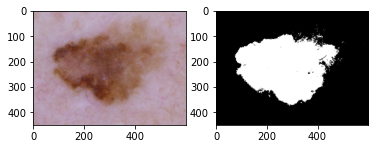

In [10]:
import cv2 #Image Library
import numpy as np #Numpy library
import matplotlib.pyplot as plt #matplotlib to show images

def dimension(imageName):
    image = cv2.imread(imageName) #read the image
    [h,w,_] = image.shape #get width and length of the image
    
    roi = image[0:h, 0:w]

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Same image but in grayscale, this is done for calculating the threshold
    _,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    f, axarr = plt.subplots(1,2) #row,column
    axarr[0].imshow(image,cmap='hsv', vmin=0, vmax=255)
    axarr[1].imshow(thresh,cmap='gray', vmin=0, vmax=255) #mask
    
imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
dimension(imname)